<a href="https://colab.research.google.com/github/Martin-Tello/Python/blob/main/VGG16_entrenada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install Keras-Applications

     |████████████████████████████████| 50 kB 2.9 MB/s 


In [1]:
!pip install Keras-Preprocessing

In [2]:
  !pip install keras_vggface

In [3]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import np_utils
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
width_shape = 224
height_shape = 224
num_classes = 11
epochs = 50
batch_size = 100

In [8]:
train_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/TRAIN'  
validation_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/VALIDATION'

In [9]:
train_datagen = ImageDataGenerator(  
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

Found 10936 images belonging to 11 classes.
Found 179 images belonging to 11 classes.


In [10]:
nb_train_samples = 10936
nb_validation_samples = 179

In [11]:
image_input = Input(shape=(width_shape, height_shape, 3))

model2 = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model2.summary()

last_layer = model2.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()

# freeze all the layers except the dense layers
for layer in custom_model.layers[:-3]:
	layer.trainable = False

custom_model.summary()

custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [12]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
109/109 [==============================] - 2336s 21s/step - loss: 7.1929 - accuracy: 0.1253 - val_loss: 4.6785 - val_accuracy: 0.2400
Epoch 2/50
109/109 [==============================] - 210s 2s/step - loss: 4.1610 - accuracy: 0.2621 - val_loss: 2.7720 - val_accuracy: 0.4100
Epoch 3/50
109/109 [==============================] - 212s 2s/step - loss: 2.5239 - accuracy: 0.4304 - val_loss: 1.4399 - val_accuracy: 0.6400
Epoch 4/50
109/109 [==============================] - 208s 2s/step - loss: 1.5635 - accuracy: 0.5745 - val_loss: 1.0596 - val_accuracy: 0.6600
Epoch 5/50
109/109 [==============================] - 209s 2s/step - loss: 1.0078 - accuracy: 0.6978 - val_loss: 0.8887 - val_accuracy: 0.7700
Epoch 6/50
109/109 [==============================] - 209s 2s/step - loss: 0.6685 - accuracy: 0.7881 - val_loss: 0.6882 - val_accuracy: 0.8100
Epoch 7/50
109/109 [==============================] - 208s 2s/step - loss: 0.4171 - accuracy: 0.8658 - val_loss: 0.4954 - val_accuracy: 0.84

In [13]:
#grabar modelo con pesos entrenados
#PESOS DE PREENTRENADO, MÁS LO QUE ESTAMOS ENTRENANDO NOSOTROS
custom_model.save("model_VGG16rained.h5")

In [14]:
def plotTraining(hist, epochs, typeData):
    
    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')
        

    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18) 
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

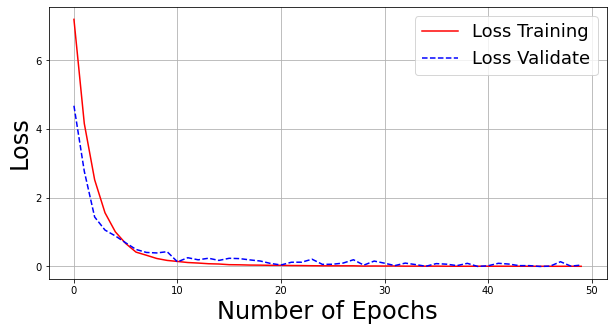

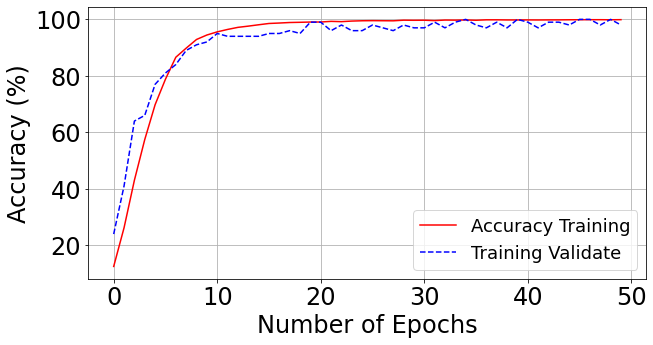

In [15]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")



VERONICA


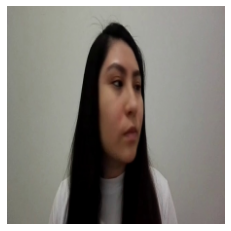

In [27]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['ANDREA','BRENDA','DANIELA','FLAVIO','JONATHAN','JORGE','MAURICIO','RICARDO','RODRIGO','VALERIA','VERONICA']
#['AFRICAN FIREFINCH','ALBATROSS','ALEXANDRINE PARAKEET','AMERICAN AVOCET','AMERICAN BITTERN',
#         'AMERICAN COOT','AMERICAN GOLDFINCH','AMERICAN KESTREL','AMERICAN PIPIT','AMERICAN REDSTART']

modelt = load_model("/content/model_VGG16rained.h5")
#modelt = custom_model

imaget_path = "/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/TEST/TEST_VERONICA/frame1445.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 90 images belonging to 11 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     1.0000    0.4000    0.5714        10
           2     1.0000    1.0000    1.0000        10
           3     0.7692    1.0000    0.8696        10
           4     1.0000    1.0000    1.0000        10
           5     1.0000    0.8000    0.8889        10
           6     1.0000    1.0000    1.0000        10
           9     1.0000    1.0000    1.0000        10
          10     0.6667    1.0000    0.8000        10

    accuracy                         0.9111        90
   macro avg     0.9373    0.9111    0.9033        90
weighted avg     0.9373    0.9111    0.9033        90



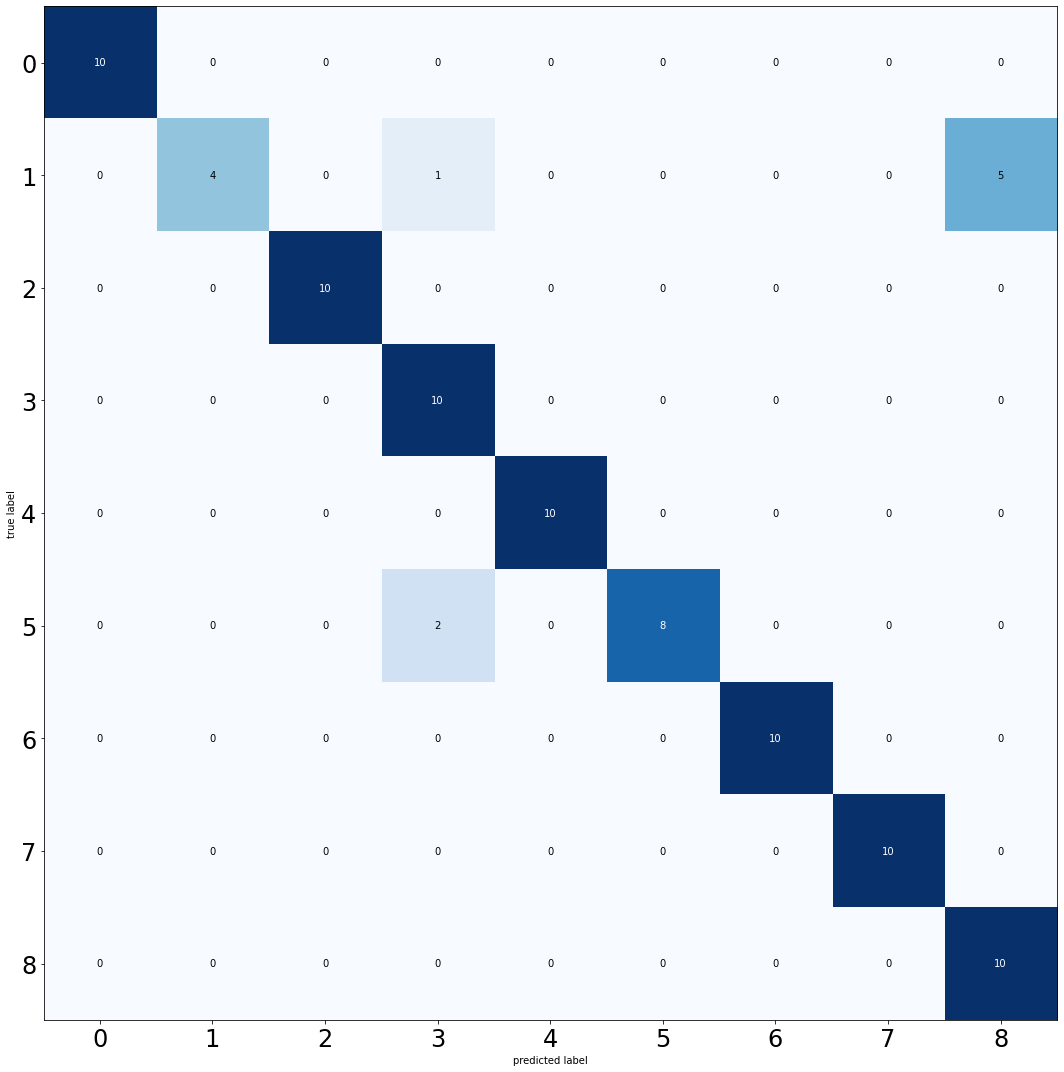

In [36]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


names = ['ANDREA','BRENDA','DANIELA','FLAVIO','JONATHAN','JORGE','MAURICIO','RICARDO','RODRIGO','VALERIA','VERONICA']
#['AFRICAN FIREFINCH','ALBATROSS','ALEXANDRINE PARAKEET','AMERICAN AVOCET','AMERICAN BITTERN',
   #      'AMERICAN COOT','AMERICAN GOLDFINCH','AMERICAN KESTREL','AMERICAN PIPIT','AMERICAN REDSTART']
#names = ['AFRICAN FIREFINCH','ALBATROSS','ALEXANDRINE PARAKEET','AMERICAN AVOCET','AMERICAN BITTERN',
#         'AMERICAN COOT','AMERICAN GOLDFINCH','AMERICAN KESTREL','AMERICAN PIPIT','AMERICAN REDSTART']


test_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/TEST'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("/content/model_VGG16rained.h5")
#modelt = custom_model

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(15,15), show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))